In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_full,y_train_full),(X_test, y_test) = mnist.load_data() 

In [3]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_valid,X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000] , y_train_full[5000:]

6

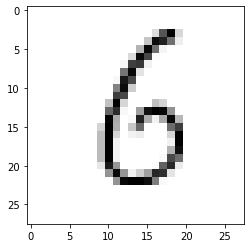

In [5]:
plt.imshow(X_train_full[18],cmap='binary')
y_train_full[18]

<AxesSubplot:>

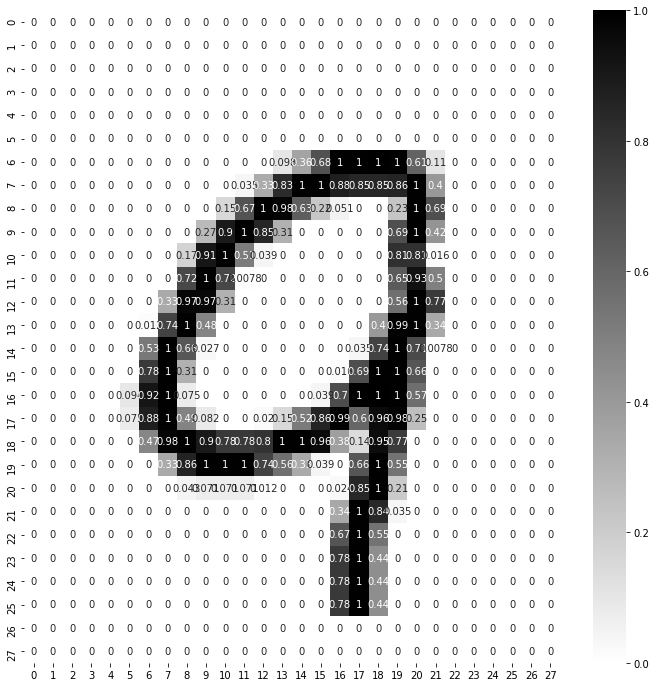

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[3000]/255.,cmap='binary',annot=True)

# Building Model

## Model architecture

In [7]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

In [8]:
model=tf.keras.models.Sequential(Layers)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Model compilation

In [10]:
loss_fnc='sparse_categorical_crossentropy'
Optimizer='SGD'
Metrics=["accuracy"]

In [11]:
model.compile(loss=loss_fnc,optimizer=Optimizer,metrics=Metrics)

## Model fitting

In [13]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
epochs=50
validation_set=(X_valid,y_valid)
history= model.fit(X_train,y_train,epochs=epochs,validation_data=validation_set,batch_size=32,callbacks=[early_stopping_cb])

Epoch 1/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6110 - accuracy: 0.8443 - val_loss: 0.3125 - val_accuracy: 0.9150
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2907 - accuracy: 0.9173 - val_loss: 0.2436 - val_accuracy: 0.9330
Epoch 3/50
1719/1719 [==============================] - 2s 995us/step - loss: 0.2378 - accuracy: 0.9328 - val_loss: 0.2046 - val_accuracy: 0.9424
Epoch 4/50
1719/1719 [==============================] - 2s 998us/step - loss: 0.2028 - accuracy: 0.9424 - val_loss: 0.1816 - val_accuracy: 0.9502
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1762 - accuracy: 0.9503 - val_loss: 0.1565 - val_accuracy: 0.9572
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1555 - accuracy: 0.9553 - val_loss: 0.1445 - val_accuracy: 0.9602
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1390 - accuracy: 0.9609 - val_loss: 0.1373 - val_accur

## Model Metrics and Evaluation

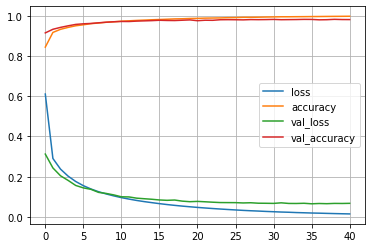

In [14]:
pd.DataFrame(history.history).plot()
plt.grid(True)

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 991us/step - loss: 12.1817 - accuracy: 0.9773


[12.181737899780273, 0.9772999882698059]

## Model prediction

In [19]:
X_testt=X_test[50:59]
y_testt=y_test[50:59]

In [20]:
y_pred=np.argmax(model.predict(X_testt),axis=-1)
y_pred

array([6, 3, 5, 5, 6, 0, 4, 1, 9], dtype=int64)

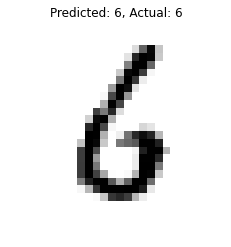

******************************


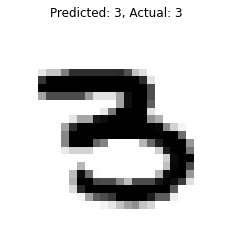

******************************


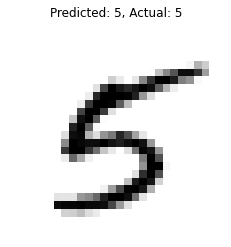

******************************


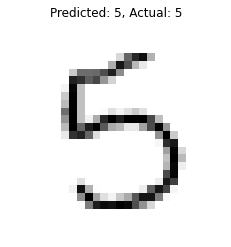

******************************


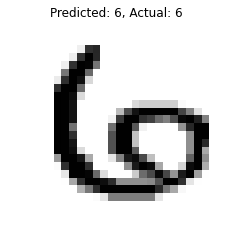

******************************


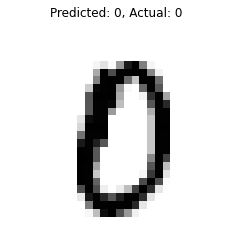

******************************


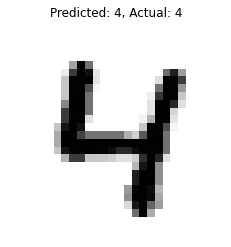

******************************


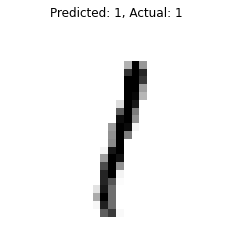

******************************


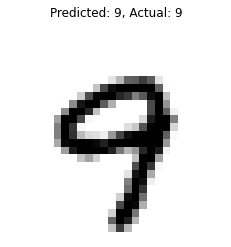

******************************


In [21]:
'''Lets check our prediction against real values'''
for data,pred,actual in zip(X_testt,y_pred,y_testt):
    plt.imshow(data,cmap='binary')
    plt.axis("off")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.show()
    print("*"*30)